# Exploration done on the EPFL recommender system

# Data Retrieval

In [26]:
import configparser
import matplotlib.pyplot as plt
import mysql.connector as sql
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# Read the confidential token.
credentials = configparser.ConfigParser()
credentials.read('credentials.ini')
db_connection = sql.connect(host=credentials.get('mysql', 'url'),
                            database='semester_project_romain',
                            user=credentials.get('mysql', 'username'),
                            password=credentials.get('mysql', 'password'))

In [27]:
# Found courses that should be removed:
courses_to_remove = [
    "Admission année sup.",
    "Projet de master en systèmes de communication",
    "SHS : Introduction au projet",
    "Cycle master",
    "Projet de Master",
    "Groupe Core courses & options",
    "Bloc Projets et SHS",
    "Groupe 2 : Options",
    "Master SC",
    "Mineur",
    "Groupe 1",
    "Projet en systèmes de communication II",
    "Projet en informatique II",
    "Projet de master en informatique",
    "Cours réservés spécifiquement aux étudiants s'inscrivant pour le mineur Area and Cultural Studies",
    "SHS : Projet",
    "Optional project in communication systems",
    "Optional project in computer science",
    "Mineur : Neurosciences computationnelles",
    "Stage d'ingénieur crédité avec le PDM (master en Systèmes de communication)",
    "Cours UNIL - Faculté des hautes études commerciales HEC I (printemps)",
]

domains_to_remove = [
    "Humanities and social sciences",
    "Programme Sciences humaines et sociales",
]

In [3]:
# PlanType = "PLAN_EXAMINE" ?????
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                SubjectName, 
                Course_Enrolments.SubjectID,
                SectionName, 
                CourseCode,
                YearName
            from 
                Course_Enrolments
                inner join 
                Course_Codes 
                    on Course_Codes.planid = course_enrolments.planid 
                    and Course_Codes.subjectid = course_enrolments.subjectid
            where 
                LevelName = "Master"
                and IsStudent = 1
                and IsEnrolled = 1
                and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")
                
            """
#all_df = pd.read_sql(all_info, con=db_connection)
#all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
#all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
#print(all_df.UnitName.unique())
#all_df

In [4]:
# PlanType = "PLAN_EXAMINE" ?????
years = """and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")"""

years_test = """and (YearName = "2006-2007"
                or YearName = "2007-2008"
                or YearName = "2008-2009"
                or YearName = "2009-2010"
                or YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")"""
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                UnitID, 
                UnitCode,
                SubjectName, 
                Course_Enrolments.SubjectID,
                SectionName, 
                CourseCode,
                YearName
            from 
                Course_Enrolments
                inner join 
                Course_Codes 
                    on Course_Codes.planid = course_enrolments.planid 
                    and Course_Codes.subjectid = course_enrolments.subjectid
            where 
                (UnitName like "%nform%" 
                or UnitName like "%omm%")
                and LevelName = "Master"
                {}
            """.format('')

all_df = pd.read_sql(all_info, con=db_connection)
all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
# Mapping of subject ids to subject names
subject_mapping = all_df[['SubjectID', 'SubjectName']].drop_duplicates()
all_df

,PersonID,PedagogicalCode,StudyDomain,UnitName,UnitID,UnitCode,SubjectName,SubjectID,SectionName,CourseCode,YearName
0,49334748,BA4,Architecture,Systèmes de communication - master,950840,SC_EPFL,Economie du logement,898353143,Architecture,AR-284,2012-2013
1,57349668,BA4,Architecture,Systèmes de communication - master,950840,SC_EPFL,Economie du logement,898353143,Architecture,AR-284,2012-2013
2,29123807,MA1,Architecture,Informatique,249847,IN,Théorie de l'espace,227270058,Architecture,AR-461,2012-2013
3,2384545,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
4,105055035,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
5,2392890,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
6,2502759,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
7,109679682,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009
8,2416702,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009
9,40908413,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009


In [5]:
current_courses = """
            select distinct 
                PedagogicalCode, 
                SubjectName, 
                SubjectID,
                StudyDomain,
                YearName
            from 
                Course_Enrolments 
            where 
                UnitName like "%ommunication%" 
                and 
                LevelName = "Master"
                and left(PedagogicalCode, 2) = "MA"
                and YearName = "2015-2016"
            """
#current_courses_df = pd.read_sql(current_courses, con=db_connection)
# These are the current courses (latest data) given in syscom @EPFL
#current_courses_df = current_courses_df[~current_courses_df.SubjectName.isin(courses_to_remove)]
#current_courses_df = current_courses_df[~current_courses_df.StudyDomain.isin(domains_to_remove)]
#current_courses_df

## Creating the binary matrix

In [6]:
courses_matrix = all_df[['PersonID', 'SubjectName']]
courses_matrix = courses_matrix.drop_duplicates()
courses_matrix = courses_matrix.set_index(['PersonID', 'SubjectName'])

def series_to_integers(series):
    "Converts a whole series to integers"
    return pd.to_numeric(series, downcast='integer')

# If the course was taken, set it to 1
courses_matrix['joined'] = 1
courses_matrix = courses_matrix.reset_index().pivot(index='PersonID', columns='SubjectName', values='joined')
courses_matrix = courses_matrix.fillna(0)
courses_matrix = courses_matrix.apply(series_to_integers)

# Removing all students that took less than five courses
MIN_COURSES_BY_STUDENT = 10
courses_matrix =courses_matrix[np.sum(courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT]
courses_matrix

SubjectName,Accounting for finance,Advanced algorithms,Advanced analysis I,Advanced analysis II,Advanced compiler construction,Advanced computer architecture,Advanced computer graphics,Advanced computer networks and distributed systems,Advanced cryptography,Advanced databases,...,Traitement des signaux biomédicaux,Traitement quantique de l'information,Traitement quantique de l'information I,Traitement quantique de l'information II,Unsupervised and reinforcement learning in neural networks,VLSI design I,VLSI design I + EDA TP,VLSI design II,Virtual reality,Wireless receivers: algorithms and architectures
PersonID,,,,,,,,,,,,,,,,,,,,,
2383414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2384545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2392890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2394223,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2394686,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2412404,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2414145,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2416092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2416702,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Co-enrolment matrix
## Most taken courses
We need to find a way to get a cleaner dataset of courses, a lot of them are not usefull or outdated and should not be recommended.

In [7]:
# Taking a look at the most taken courses
registrations_df = all_df.set_index(['SubjectName', 'YearName'])
all_df_registrations = registrations_df.groupby(['SubjectName', 'YearName']).size()

registrations_df['Registration'] = all_df_registrations
registrations_df = registrations_df.reset_index()
# Pick only courses that have a study domain (removes bullshit)
# such as Projects and groups, minors etc
registrations_df = registrations_df[~registrations_df.StudyDomain.isnull()]
# Remove the SHS courses
registrations_df = registrations_df[~(registrations_df.StudyDomain == "Programme Sciences humaines et sociales")]
# Removes non important information
registrations_df = registrations_df.drop([
    'PersonID', "StudyDomain", "SectionName", "PedagogicalCode",
    "CourseCode"], axis=1)
registrations_df = registrations_df.drop_duplicates()
registrations_df = registrations_df.set_index(['SubjectName', 'YearName']).sort_index()
registrations = registrations_df.sort_values(ascending=False, by='Registration')

# Latest data registrations
registrations.xs('2015-2016', level='YearName')

,UnitName,UnitID,UnitCode,SubjectID,Registration
SubjectName,,,,,
Pattern classification and machine learning,Informatique,249847,IN,1771468,192
Pattern classification and machine learning,Systèmes de communication - master,950840,SC_EPFL,1771468,192
Cryptography and security,Informatique,249847,IN,1770973,170
Cryptography and security,Systèmes de communication - master,950840,SC_EPFL,1770973,170
Distributed algorithms,Informatique,249847,IN,1773287,167
Distributed algorithms,Systèmes de communication - master,950840,SC_EPFL,1773287,167
TCP/IP networking,Systèmes de communication - master,950840,SC_EPFL,1771764,167
TCP/IP networking,Informatique,249847,IN,1771764,167
Intelligent agents,Systèmes de communication - master,950840,SC_EPFL,1771183,130


## Enrolments

In [8]:
co_enrolments = pd.DataFrame(data=0, columns=courses_matrix.columns, index=courses_matrix.columns)
for row in courses_matrix.iterrows():
    taken_courses = row[1][row[1] == 1].index.tolist()
    for i,course in enumerate(taken_courses):
        co_enrolments.loc[course, taken_courses[i+1:]] += 1
    

# Copy the upper triangle matrix to lower triangle one
co_enrolments = co_enrolments + co_enrolments.T

# Transforming to probabilities and removing the rows summing to nan
co_enrolments = co_enrolments / co_enrolments.sum(axis=0)

def get_coenrolment(course, other_enrolments):
    return co_enrolments.loc[course, other_enrolments].mean()

def training_weight_coenrolments(user_index):
    courses_taken = courses_matrix.iloc[user_index][courses_matrix.iloc[user_index] == 1].index.tolist()
    return [ get_coenrolment(c, courses_taken) for c in courses_matrix.columns.tolist() ]

## Grades correlations inbetween courses

In [9]:
def course_id_mapper(sub_id):
    mapped = subject_mapping[subject_mapping.SubjectID == sub_id].SubjectName
    return mapped.values[0] if not mapped.empty else np.nan

# If one of the correlations is non-existent, return the other
def correlation_series_mean(f_corr, s_corr):
    if f_corr == -5 and s_corr == -5: raise Exception("both correlations non-existent")
    if f_corr == -5 or s_corr == -5: return max(f_corr, s_corr)
    return np.mean([f_corr, s_corr])
    
# Retrieve courses correlations
grade_corr = pd.read_csv('data/correlation-subject-pair.csv')
grade_corr = grade_corr[['sub1', 'sub2', "cor1", "cor2"]]
grade_corr['cor_mean'] = grade_corr[['cor1', 'cor2']].apply(lambda x: correlation_series_mean(x[0],x[1]), axis=1)
grade_corr = grade_corr[['sub1', 'sub2', 'cor_mean']]

# Use SubjectName instead of SubjectID
grade_corr['sub1_name'] = grade_corr.sub1.map(course_id_mapper)
grade_corr['sub2_name'] = grade_corr.sub2.map(course_id_mapper)
grade_corr = grade_corr.dropna()[['sub1_name', 'sub2_name', 'cor_mean']]

# In case there are no correlations, we set to the mean of all of them
mean_correlations = grade_corr.mean()

# Let's make it a matrix
grade_corr_matrix = grade_corr.set_index(["sub1_name", "sub2_name"]).unstack(level=0).fillna(mean_correlations)
# A negative correlation is considered the same as a positive one, hence np.abs
grade_corr_matrix = grade_corr_matrix.apply(np.abs)

# Set not found courses correlations to the mean of all correlations
no_corr_courses = [ c for c in courses_matrix.columns.tolist() if c not in grade_corr_matrix.index.tolist() ]
missing_correlations = pd.DataFrame(np.full(fill_value=mean_correlations, 
                                            shape=(grade_corr_matrix.shape[0], len(no_corr_courses))), 
                                    columns=no_corr_courses, 
                                    index=grade_corr_matrix.index.tolist())
grade_corr_matrix.columns = grade_corr_matrix.columns.droplevel()
grade_corr_matrix = pd.concat([grade_corr_matrix, missing_correlations], axis=1)

# Let's transform it into probabilistic
grade_corr_matrix = grade_corr_matrix / grade_corr_matrix.sum(axis=0)

def get_grades_corr(course, other_enrolments):
    if course not in grade_corr_matrix.index.tolist():
        return 1/grade_corr_matrix.shape[1]
    return grade_corr_matrix.loc[course, other_enrolments].mean()

def training_weight_grade_corr(user_index):
    courses_taken = courses_matrix.iloc[user_index][courses_matrix.iloc[user_index] == 1].index.tolist()
    return [ get_grades_corr(c, courses_taken) for c in courses_matrix.columns.tolist() ]

# The final dataframe of courses correlations
grade_corr_matrix

,Advanced algorithms,Advanced compiler construction,Advanced computer architecture,Advanced computer graphics,Advanced databases,Advanced digital communications,Algorithms,Algèbre,Analog circuits design I,Analyse I,...,Théorie de Galois,Théorie de l'espace,Topics in theoretical computer science,Traitement quantique de l'information,Traitement quantique de l'information I,Traitement quantique de l'information II,VLSI design I,VLSI design I + EDA TP,VLSI design II,Wireless receivers: algorithms and architectures
sub2_name,,,,,,,,,,,,,,,,,,,,,
Advanced algorithms,0.005733,0.005654,0.005731,0.008507,0.006318,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Advanced computer architecture,0.005733,0.005654,0.005731,0.005735,0.005644,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Advanced cryptography,0.005733,0.005654,0.005731,0.005735,0.005644,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Advanced digital communications,0.005733,0.005654,0.005731,0.005735,0.005644,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Advanced theoretical computer science,0.005733,0.005654,0.005731,0.005735,0.005644,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Algebra,0.005733,0.005654,0.005731,0.005735,0.005644,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Algorithms,0.005733,0.005654,0.005731,0.005735,0.005644,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Algèbre,0.005733,0.005654,0.005731,0.005735,0.005644,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Analyse I,0.005733,0.005654,0.005731,0.005735,0.005644,0.005621,0.005725,0.005864,0.005764,0.005687,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747


### Splitting test/train

In [10]:
def split_data(data):
    testing_set = data.applymap(lambda x: 0)

    taken_courses_flat = data.stack().to_frame()
    taken_courses_flat = taken_courses_flat[taken_courses_flat[0] == 1]

    for student in taken_courses_flat.index.get_level_values('PersonID').unique():
        courses = taken_courses_flat.loc[student]
        for course in courses.sample(frac=0.2, replace=False).index:
            testing_set.loc[student, course] = 1
    training_set = data - testing_set

    return training_set, testing_set

training_set, testing_set = split_data(courses_matrix)

# Numpify the data
train_np = training_set.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np = testing_set.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()

# the indices of each user
users = np.array(np.arange(courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)

### Metrics

In [11]:
# Precision is the percentage of recommended items that are "good ones"
# Hence, the matched prediction divided by N of Top-N
def precision(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns precision
    """
    precisions = []
    for i,user in enumerate(y_pred):
        nb_right_pred = sum(y_true[i, user] == 1)
        precisions.append(nb_right_pred / y_pred.shape[1])
    return np.mean(precisions)
    
#Recall is the percentage of good ones that are recommended.
def recall(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns recall
    """
    recall = []
    for i,user in enumerate(y_pred):
        nb_right_pred = sum(y_true[i, user] == 1)
        recall.append(nb_right_pred / y_true[i].sum())
    return np.mean(recall)
    
def f1_score(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns f1 score
    """
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1 = 2 * (prec * rec) / (prec + rec)
    return f1

def mean_average_precision(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns the mean average precision
    """
    N = y_pred.shape[1]
    average_prec = []
    for i, user in enumerate(y_pred):
        summed_prec = 0
        for k in np.arange(N):
            prec_k = sum(y_true[i, user] == 1) / N
            rel_k = y_true[i, user[-1]]
            summed_prec += (prec_k * rel_k)
        average_prec.append(summed_prec / min(N, y_true[i].sum()))
    
    return np.mean(average_prec)

#### Collaborative filtering with Collaborative Denoising Auto-Encoders

In [12]:
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, Activation
from keras.layers.merge import Add
from keras.models import Model
from keras.regularizers import l2

def create(I, U, K, hidden_activation, output_activation, q=0.5, l=0.01):
    '''
    create model
    Reference:
      Yao Wu, Christopher DuBois, Alice X. Zheng, Martin Ester.
        Collaborative Denoising Auto-Encoders for Top-N Recommender Systems.
          The 9th ACM International Conference on Web Search and Data Mining (WSDM'16), p153--162, 2016.

    :param I: number of items
    :param U: number of users
    :param K: number of units in hidden layer
    :param hidden_activation: activation function of hidden layer
    :param output_activation: activation function of output layer
    :param q: drop probability
    :param l: regularization parameter of L2 regularization
    :return: CDAE
    :rtype: keras.models.Model
    '''
    x_item = Input((I,), name='x_item')
    h_item = Dropout(q)(x_item)
    h_item = Dense(K, kernel_regularizer=l2(l), bias_regularizer=l2(l))(h_item)

    # dtype should be int to connect to Embedding layer
    x_user = Input((1,), dtype='int32', name='x_user')
    h_user = Embedding(input_dim=U, output_dim=K, input_length=1, embeddings_regularizer=l2(l))(x_user)
    h_user = Flatten()(h_user)

#    h = merge([h_item, h_user], mode='sum')
    h = Add()([h_item, h_user])
    if hidden_activation:
        h = Activation(hidden_activation)(h)
    y = Dense(I, activation=output_activation)(h)

    return Model(inputs=[x_item, x_user], outputs=y)

def success_rate(true, pred):
    """
    The success rate is defined as the percentage of chances that we pick
    one of the recommendations.
    """
    cnt = 0
    for i in range(pred.shape[0]):
        t = np.where(true[i] == 1) # true set
        ary = np.intersect1d(pred[i], t)
        if ary.size > 0:
            cnt += 1
    return cnt * 100 / pred.shape[0]

Using TensorFlow backend.


In [13]:
#for k_test in np.arange(2, 30, 5):
q_test = 0.998
    #q_test = 0.99
#for q_test in np.arange(0.9975, 0.9985, 0.0001):
    #k_test = 18
k_test = 27

# model
# Q was 0.50, now 0.998 ?
model = create(I=train_np.shape[1], U=len(users)+1, K=k_test,
                    hidden_activation='relu', output_activation='sigmoid', q=q_test, l=0.01)
model.compile(loss='mean_absolute_error', optimizer='adam') 
#model.compile(loss='binary_crossentropy', optimizer='adam') 

#    model.summary()

# train
history = model.fit(x=[train_np, users], y=train_np,
                    batch_size=128, epochs=2000, verbose=0,
                    #validation_data=[[test_np, users],
                    #test_np])
                    validation_split=0.20)

pred = model.predict(x=[test_np, users])
pred = pred * (train_np == 0) # remove watched items from predictions

In [14]:
def print_stats_prediction(pred):
    sorted_predictions = np.argsort(pred)

    mean_aps = []
    precisions, recalls, f1s = [], [], []

    # Take the N best recommendations
    N = 20
    print("For k =", k_test, ":")
    print("For q =", q_test, ":")
    print("\tdifference of success rates at 10 - 1:", success_rate(test_np, sorted_predictions[:,-10:]) - success_rate(test_np, sorted_predictions[:,-1:]))
    for n in range(1, N + 1):
        prediction_at_n = sorted_predictions[:, -n:]
        mean_ap = mean_average_precision(test_np, prediction_at_n)
        mean_aps.append(mean_ap)
        prec = precision(test_np, prediction_at_n)
        precisions.append(prec)
        rec = recall(test_np, prediction_at_n)
        recalls.append(rec)
        f1 = f1_score(test_np, prediction_at_n)
        f1s.append(f1)
        sr = success_rate(test_np, prediction_at_n)
        print("\n\tSuccess Rate at {:d}: {:f}".format(n, sr))
        print("\tMAP at {}: {}".format(n, mean_ap))
        print("\tPrecision at {}: {}".format(n, prec))
        print("\tRecall at {}: {}".format(n, rec))
        print("\tF1 score at {}: {}".format(n, f1))
        
    # Plotting the MAP at k
    map_df = pd.DataFrame(mean_aps)
    map_df.index.name = 'K'
    map_df.rename(columns={0:'Mean average precision'}, inplace=True)
    map_df = map_df.reset_index()
    map_df['K'] = map_df['K'] + 1

    col_pal = sns.cubehelix_palette(N, reverse=True)
    sns.barplot(x="K", y="Mean average precision", data=map_df, palette=col_pal)
    plt.title("Mean average precision at k for top-k courses recommendations")
    plt.show()


    prec_rec_df = pd.DataFrame(data={"Precision":precisions, "Recall":recalls})
    plt.plot(recalls, precisions, color='b', alpha=0.2)
    plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.show()

## Baseline prediction

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 49.875

	Success Rate at 1: 30.625000
	MAP at 1: 0.30625
	Precision at 1: 0.30625
	Recall at 1: 0.09819940476190475
	F1 score at 1: 0.14871362081018433

	Success Rate at 2: 49.625000
	MAP at 2: 0.200625
	Precision at 2: 0.295625
	Recall at 2: 0.18684821428571424
	F1 score at 2: 0.22897438329292888

	Success Rate at 3: 59.625000
	MAP at 3: 0.16187499999999996
	Precision at 3: 0.25958333333333333
	Recall at 3: 0.24801488095238095
	F1 score at 3: 0.2536672813338571

	Success Rate at 4: 65.375000
	MAP at 4: 0.15416666666666667
	Precision at 4: 0.2228125
	Recall at 4: 0.2841190476190476
	F1 score at 4: 0.24975867292122894

	Success Rate at 5: 69.625000
	MAP at 5: 0.15914583333333332
	Precision at 5: 0.19975
	Recall at 5: 0.316952380952381
	F1 score at 5: 0.24505882081883743

	Success Rate at 6: 72.625000
	MAP at 6: 0.16529166666666664
	Precision at 6: 0.178125
	Recall at 6: 0.34003571428571433
	F1 score at 6: 0.23378407485

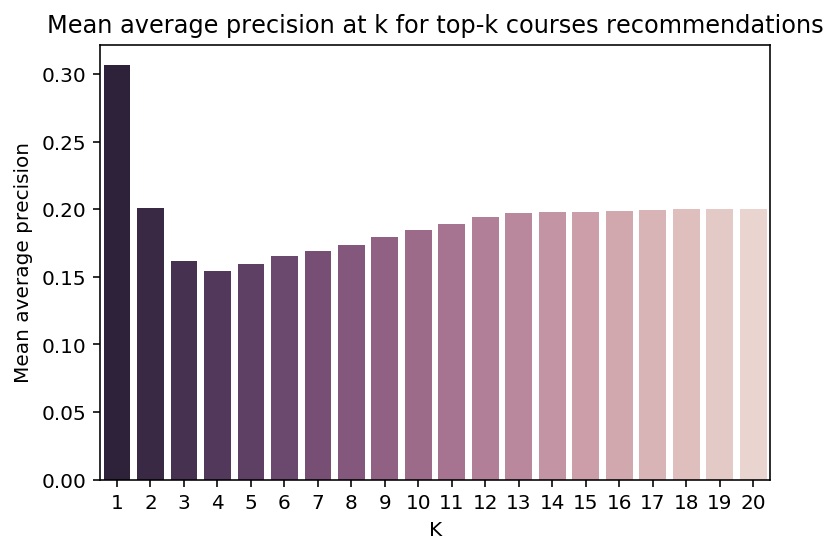

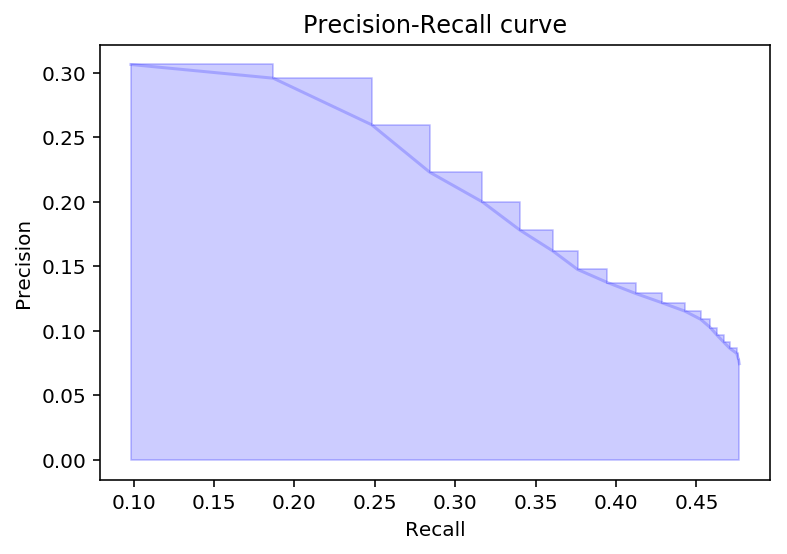

In [15]:
print_stats_prediction(pred)

## Only co-enrolment matrix

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 64.125

	Success Rate at 1: 14.500000
	MAP at 1: 0.145
	Precision at 1: 0.145
	Recall at 1: 0.04802083333333333
	F1 score at 1: 0.07214786832164058

	Success Rate at 2: 28.250000
	MAP at 2: 0.08125
	Precision at 2: 0.15
	Recall at 2: 0.10143749999999999
	F1 score at 2: 0.1210290827740492

	Success Rate at 3: 39.000000
	MAP at 3: 0.06499999999999999
	Precision at 3: 0.14833333333333332
	Recall at 3: 0.14764583333333334
	F1 score at 3: 0.14798878487130754

	Success Rate at 4: 47.375000
	MAP at 4: 0.0646875
	Precision at 4: 0.1390625
	Recall at 4: 0.18408333333333332
	F1 score at 4: 0.15843675456127906

	Success Rate at 5: 55.125000
	MAP at 5: 0.06914583333333332
	Precision at 5: 0.13675
	Recall at 5: 0.2250416666666667
	F1 score at 5: 0.17012248070943223

	Success Rate at 6: 61.000000
	MAP at 6: 0.07141666666666666
	Precision at 6: 0.13208333333333333
	Recall at 6: 0.25828273809523805
	F1 score at 6: 0.17478386308130595

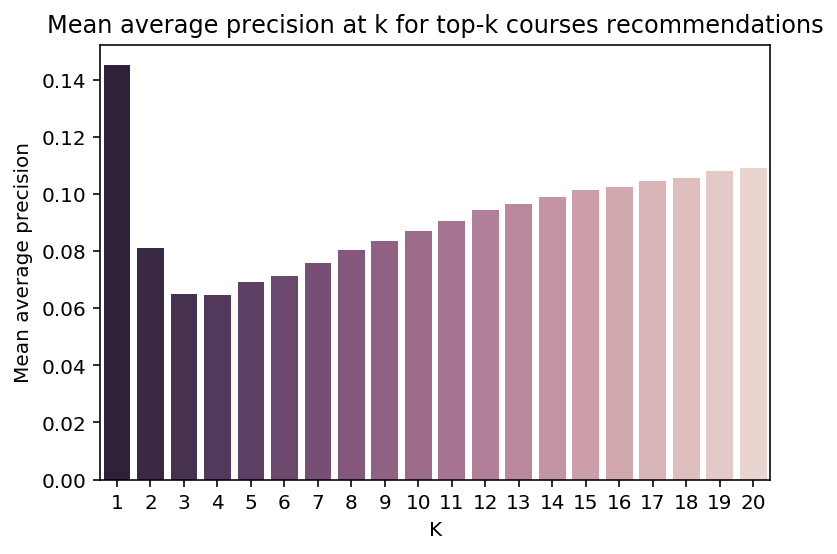

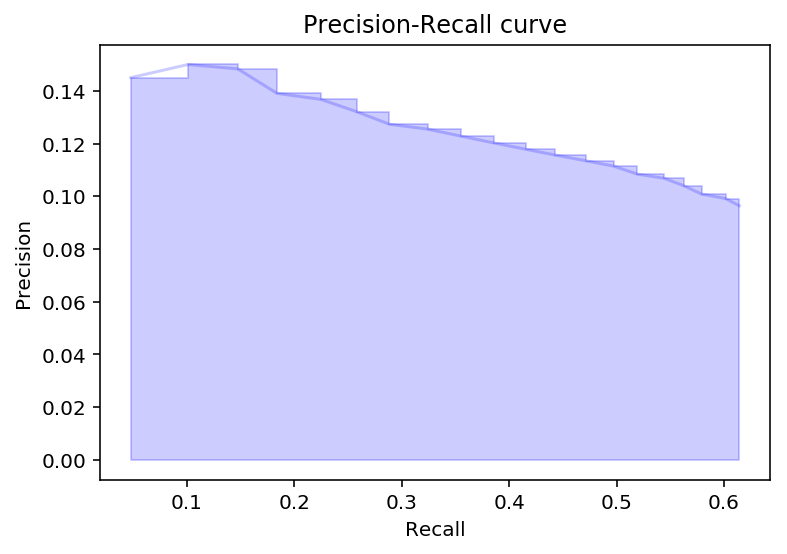

In [16]:
preds = np.array([ np.array(training_weight_coenrolments(i)) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Only grade correlations inbetween courses

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 43.125

	Success Rate at 1: 9.500000
	MAP at 1: 0.095
	Precision at 1: 0.095
	Recall at 1: 0.03016666666666666
	F1 score at 1: 0.04579227696404793

	Success Rate at 2: 16.750000
	MAP at 2: 0.049375
	Precision at 2: 0.085625
	Recall at 2: 0.05420833333333333
	F1 score at 2: 0.06638744040524433

	Success Rate at 3: 23.000000
	MAP at 3: 0.035625
	Precision at 3: 0.07875
	Recall at 3: 0.07543749999999999
	F1 score at 3: 0.07705816781516012

	Success Rate at 4: 29.250000
	MAP at 4: 0.034375
	Precision at 4: 0.07875
	Recall at 4: 0.09997916666666665
	F1 score at 4: 0.08810379997668724

	Success Rate at 5: 34.375000
	MAP at 5: 0.034249999999999996
	Precision at 5: 0.076
	Recall at 5: 0.12072916666666667
	F1 score at 5: 0.09327967806841046

	Success Rate at 6: 38.500000
	MAP at 6: 0.034541666666666665
	Precision at 6: 0.071875
	Recall at 6: 0.13724999999999998
	F1 score at 6: 0.09434399282725642

	Success Rate at 7: 42.375000

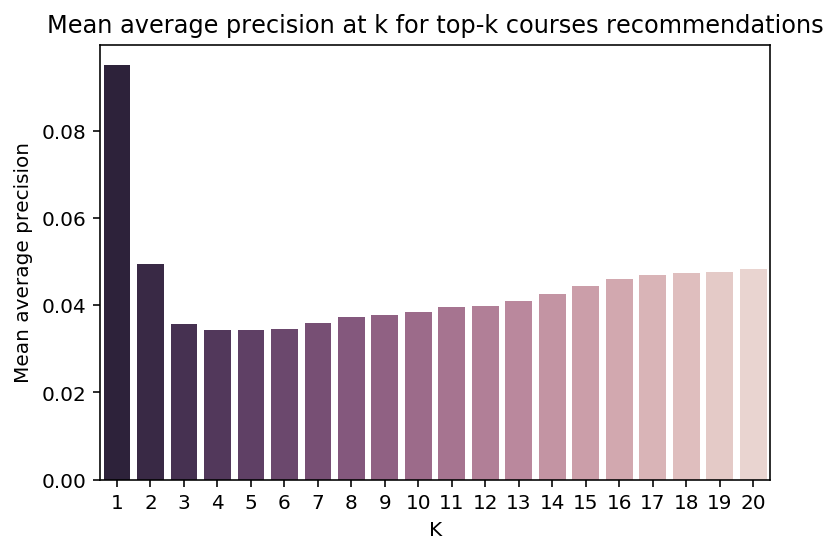

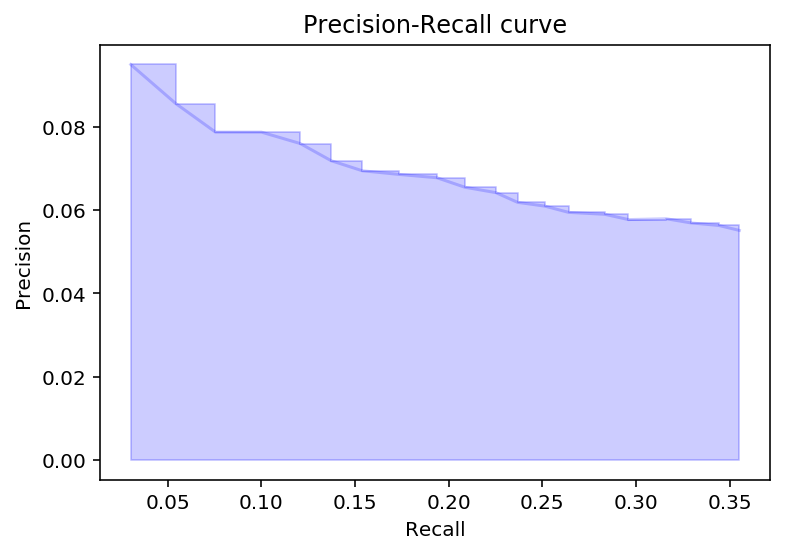

In [17]:
preds = np.array([ np.array(training_weight_grade_corr(i)) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Baseline + co-enrolment matrix

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 51.875

	Success Rate at 1: 38.375000
	MAP at 1: 0.38375
	Precision at 1: 0.38375
	Recall at 1: 0.12399107142857142
	F1 score at 1: 0.18742456081734574

	Success Rate at 2: 51.750000
	MAP at 2: 0.243125
	Precision at 2: 0.31
	Recall at 2: 0.1967857142857143
	F1 score at 2: 0.24074700493305148

	Success Rate at 3: 63.000000
	MAP at 3: 0.194375
	Precision at 3: 0.27416666666666667
	Recall at 3: 0.25951488095238096
	F1 score at 3: 0.2666396474771866

	Success Rate at 4: 70.875000
	MAP at 4: 0.19104166666666667
	Precision at 4: 0.2496875
	Recall at 4: 0.31441369047619044
	F1 score at 4: 0.27833718370458693

	Success Rate at 5: 75.875000
	MAP at 5: 0.20424999999999996
	Precision at 5: 0.23024999999999998
	Recall at 5: 0.3625178571428571
	F1 score at 5: 0.28162706732941706

	Success Rate at 6: 79.375000
	MAP at 6: 0.21729166666666663
	Precision at 6: 0.21375
	Recall at 6: 0.40283035714285714
	F1 score at 6: 0.27929851427081

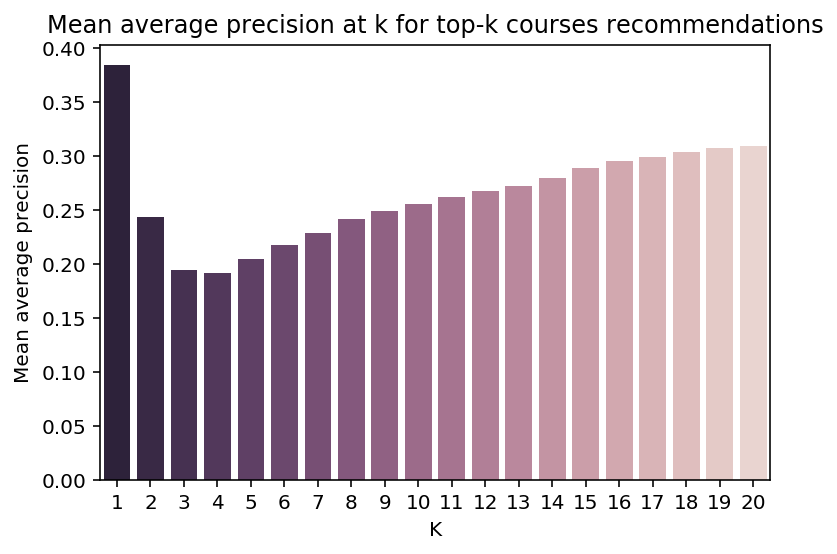

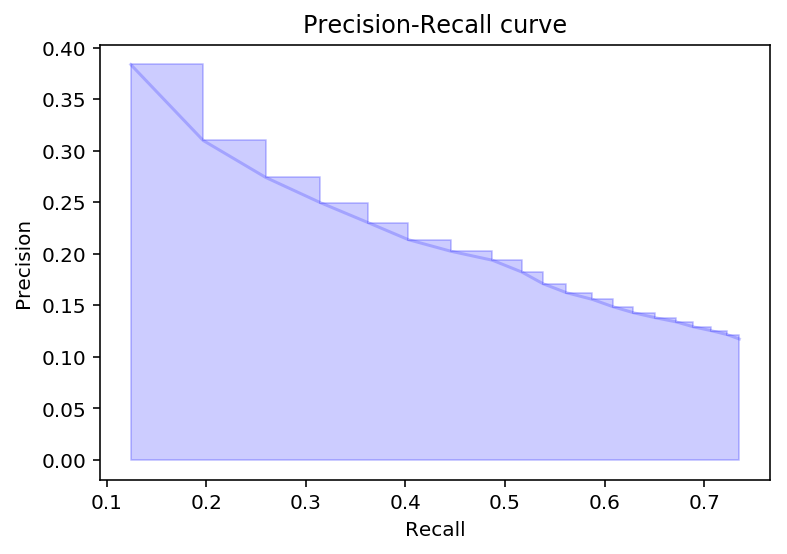

In [18]:
preds = np.array([ np.array(training_weight_coenrolments(i)) * np.array(nn_weights) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Baseline + grade correlations inbetween courses

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 46.75

	Success Rate at 1: 32.375000
	MAP at 1: 0.32375
	Precision at 1: 0.32375
	Recall at 1: 0.10222023809523809
	F1 score at 1: 0.15538081829995948

	Success Rate at 2: 46.750000
	MAP at 2: 0.205625
	Precision at 2: 0.2775
	Recall at 2: 0.1761994047619047
	F1 score at 2: 0.2155406610995585

	Success Rate at 3: 59.375000
	MAP at 3: 0.161875
	Precision at 3: 0.2504166666666666
	Recall at 3: 0.23961904761904762
	F1 score at 3: 0.2448988978775437

	Success Rate at 4: 66.500000
	MAP at 4: 0.16041666666666665
	Precision at 4: 0.225
	Recall at 4: 0.2873482142857143
	F1 score at 4: 0.2523804959657041

	Success Rate at 5: 70.875000
	MAP at 5: 0.16210416666666663
	Precision at 5: 0.20075000000000004
	Recall at 5: 0.32188988095238097
	F1 score at 5: 0.24728076044804598

	Success Rate at 6: 74.000000
	MAP at 6: 0.16393749999999996
	Precision at 6: 0.17875
	Recall at 6: 0.3437023809523809
	F1 score at 6: 0.2351862211183521

	Su

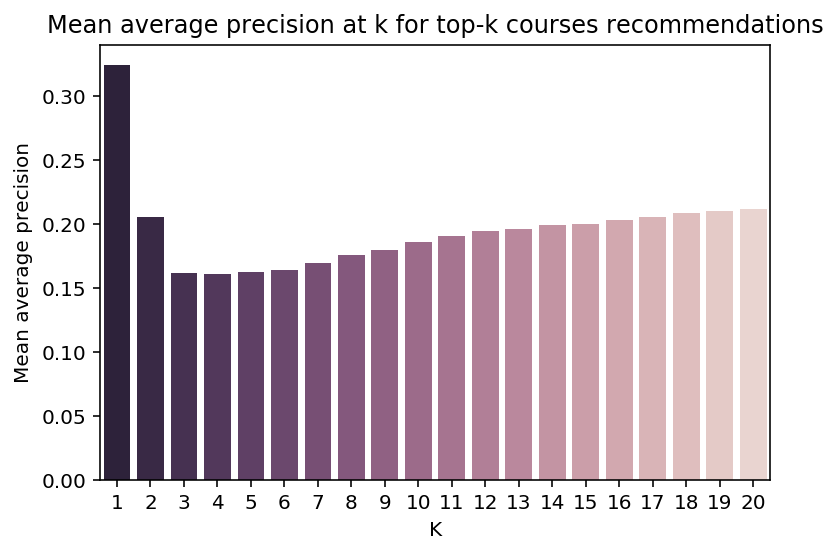

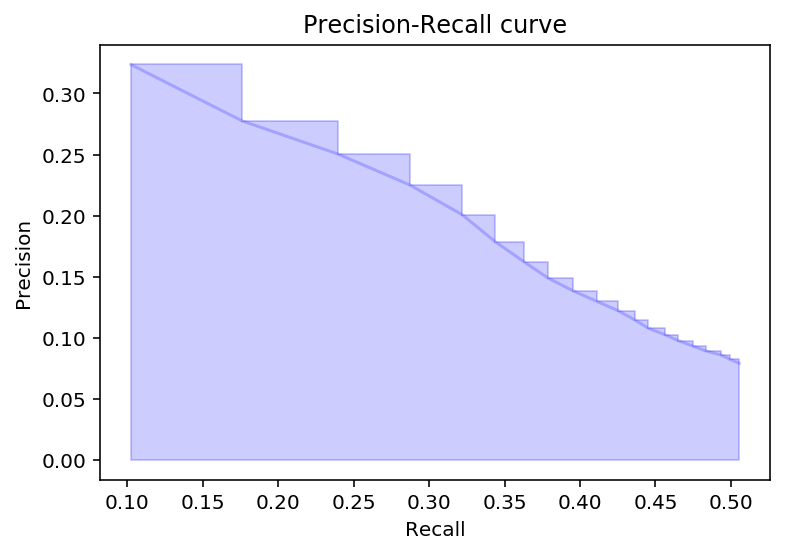

In [19]:
preds = np.array([ np.array(training_weight_grade_corr(i)) * np.array(nn_weights) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Grade correlations inbetween courses + co-enrolments

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 63.375

	Success Rate at 1: 14.500000
	MAP at 1: 0.145
	Precision at 1: 0.145
	Recall at 1: 0.04789583333333333
	F1 score at 1: 0.07200669618749324

	Success Rate at 2: 29.500000
	MAP at 2: 0.08125
	Precision at 2: 0.15625
	Recall at 2: 0.10483333333333332
	F1 score at 2: 0.12547877433769547

	Success Rate at 3: 40.125000
	MAP at 3: 0.06208333333333333
	Precision at 3: 0.14708333333333332
	Recall at 3: 0.14633333333333332
	F1 score at 3: 0.14670737479882606

	Success Rate at 4: 47.500000
	MAP at 4: 0.06260416666666666
	Precision at 4: 0.139375
	Recall at 4: 0.18237499999999998
	F1 score at 4: 0.15800165112665113

	Success Rate at 5: 55.000000
	MAP at 5: 0.066
	Precision at 5: 0.13375
	Recall at 5: 0.21945833333333334
	F1 score at 5: 0.1662053202784004

	Success Rate at 6: 60.500000
	MAP at 6: 0.06849999999999999
	Precision at 6: 0.12958333333333333
	Recall at 6: 0.2534285714285714
	F1 score at 6: 0.17148354210051905



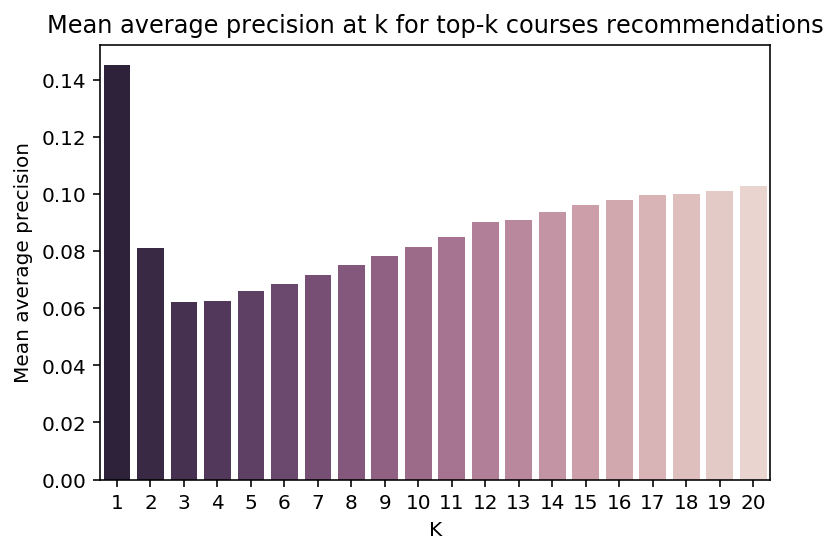

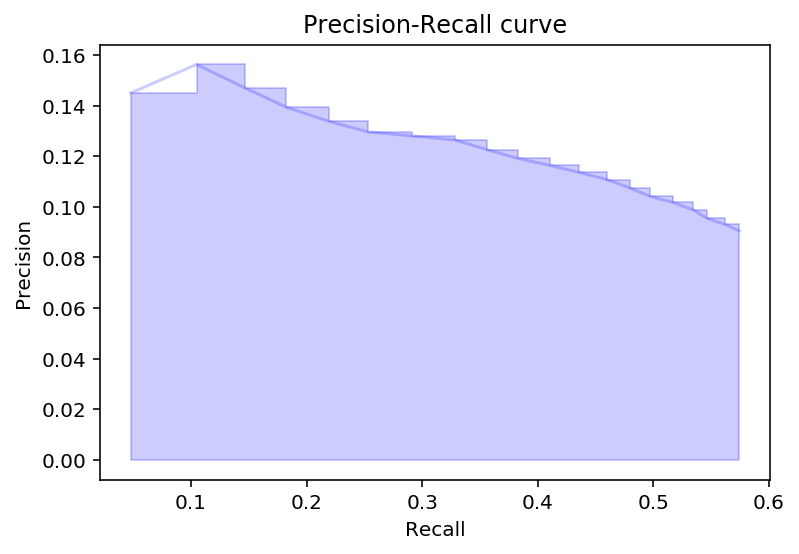

In [20]:
preds = np.array([ np.array(training_weight_coenrolments(i)) * np.array(training_weight_grade_corr(i)) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Baseline + grade correlations inbetween courses + co-enrolments

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 53.0

	Success Rate at 1: 35.500000
	MAP at 1: 0.355
	Precision at 1: 0.355
	Recall at 1: 0.11353273809523809
	F1 score at 1: 0.17204399499450537

	Success Rate at 2: 50.750000
	MAP at 2: 0.22875
	Precision at 2: 0.305
	Recall at 2: 0.19288988095238094
	F1 score at 2: 0.23632299406423535

	Success Rate at 3: 62.375000
	MAP at 3: 0.184375
	Precision at 3: 0.27166666666666667
	Recall at 3: 0.2579315476190476
	F1 score at 3: 0.26462099712457965

	Success Rate at 4: 71.125000
	MAP at 4: 0.17833333333333332
	Precision at 4: 0.249375
	Recall at 4: 0.3148809523809524
	F1 score at 4: 0.2783255973416319

	Success Rate at 5: 76.000000
	MAP at 5: 0.1859375
	Precision at 5: 0.229
	Recall at 5: 0.36118452380952376
	F1 score at 5: 0.28028947766537904

	Success Rate at 6: 79.000000
	MAP at 6: 0.19581249999999997
	Precision at 6: 0.20979166666666665
	Recall at 6: 0.3957172619047619
	F1 score at 6: 0.274209611077524

	Success Rate at 

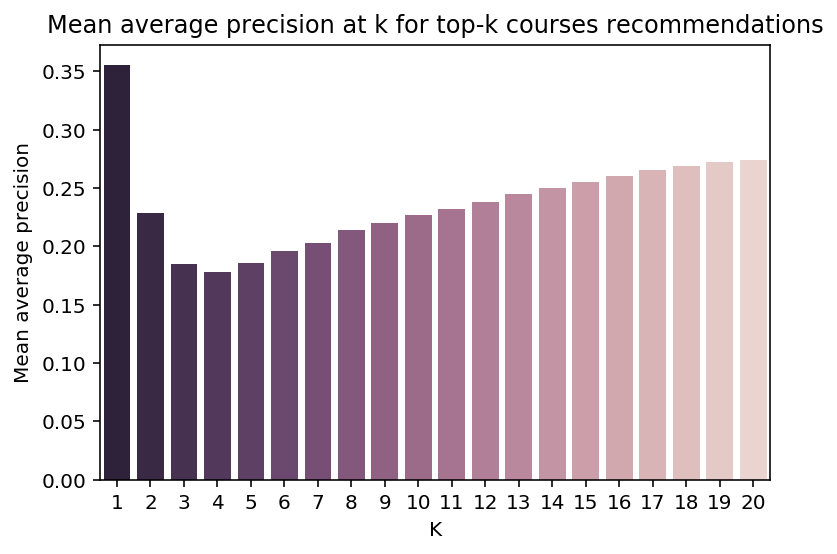

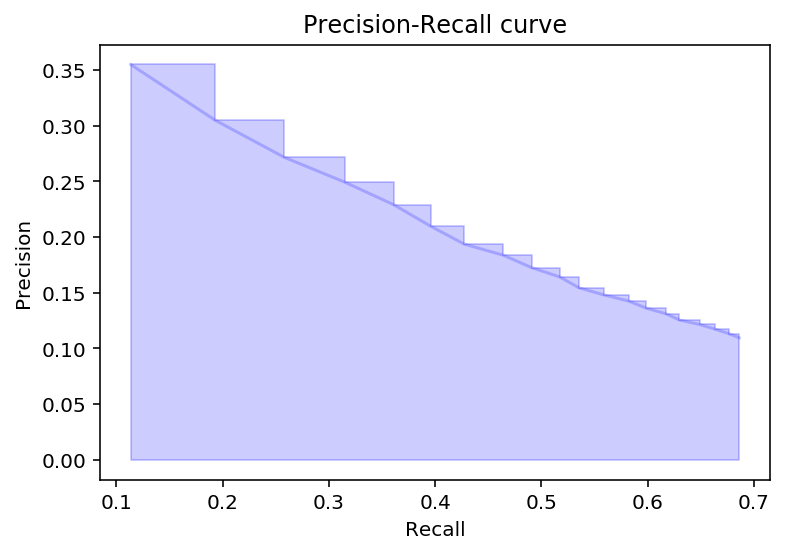

In [21]:
preds = np.array([ np.array(training_weight_coenrolments(i)) * np.array(training_weight_grade_corr(i)) * np.array(nn_weights) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

### Splitting into group1, group2 courses

In [22]:
group1_courses = ["Advanced algorithms", "Advanced computer architecture",
                 "Cryptography and security", "Advanced databases",
                 "Distributed algorithms", "Distributed information systems",
                 "Foundations of software", "Information theory and coding",
                 "Pattern classification and machine learning"]
MIN_COURSES_BY_STUDENT_group1 = 2
MIN_COURSES_BY_STUDENT_group2 = 3

group1_courses_matrix = courses_matrix[group1_courses]
group1_courses_matrix = group1_courses_matrix[np.sum(group1_courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT_group1]
group2_courses_matrix = courses_matrix.drop(group1_courses, axis=1)
group2_courses_matrix = group2_courses_matrix[np.sum(group2_courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT_group2]

training_set_group1, testing_set_group1 = split_data(group1_courses_matrix)
training_set_group2, testing_set_group2 = split_data(group2_courses_matrix)

# Numpify the data
train_np_1 = training_set_group1.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np_1 = testing_set_group1.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
train_np_2 = training_set_group2.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np_2 = testing_set_group2.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()

# the indices of each user
users_group1 = np.array(np.arange(group1_courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)
users_group2 = np.array(np.arange(group2_courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)

### Prediction for a student

In [23]:
me = [ 
"Distributed information systems",
"Information theory and coding",
"Pattern classification and machine learning",
"Mobile networks",
"Statistical signal and data processing through applications",
"TCP/IP networking",
"Digital education & learning analytics"]
my_courses = pd.DataFrame(data=0, columns=courses_matrix.columns, index=["Romain"])
my_courses[me] = 1
taken_courses = my_courses.loc["Romain"][my_courses.loc["Romain"] == 1].index.tolist()

my_binary_courses = my_courses.as_matrix()
binary_courses_format = np.array([[1]], dtype=np.int32)

In [24]:
prediction_romain = model.predict(x=[my_binary_courses, binary_courses_format])
prediction_romain = np.argsort(prediction_romain)

predicted_courses = [courses_matrix.columns[i] for i in prediction_romain[0]]
last_year_courses = list(registrations.xs('2015-2016', level='YearName').index)
predicted_courses = [c for c in predicted_courses if c in last_year_courses and c not in taken_courses]

print("I picked the following courses: \n\t-{} \n\nHence we propose the following: \n\t-{}"
     .format("\n\t-".join(taken_courses), "\n\t-".join(predicted_courses[::-1][:10])))

I picked the following courses: 
	-Digital education & learning analytics
	-Distributed information systems
	-Information theory and coding
	-Mobile networks
	-Pattern classification and machine learning
	-Statistical signal and data processing through applications
	-TCP/IP networking 

Hence we propose the following: 
	-Distributed algorithms
	-Cryptography and security
	-Biometrics
	-Advanced digital communications
	-Advanced computer graphics
	-Foundations of software
	-Intelligent agents
	-Stage d'ingénieur crédité avec le PDM (master en Informatique)
	-Audio
	-B2B - high-tech marketing


### Done
- All data gives really bad results (discrimination by section)
- Results are different from one domain to another (BEFORE WEIGHING OUT THE OBLIGATORY COURSES, or courses that are bloat (laboratories etc..., case by case basis ?)
- [They talk a bit about top-N recommendation in this paper (Boi)](http://delivery.acm.org/10.1145/2810000/2800184/p179-maksai.pdf?ip=128.179.189.64&id=2800184&acc=ACTIVE%20SERVICE&key=FC66C24E42F07228%2E7E17DDD1CCA0F75B%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&CFID=1003867347&CFTOKEN=59100520&__acm__=1510214008_777b3b2b2f3763bb6c7aa57bcdcdf49a)
- Move to the new data
- Right precision and recall metrics
- Right test/train se
- Try on like 5 sections with same parameters if still good results
- Doing it by faculty gives same results (for IC)
- Split options and obligatory recommendations
- Quick hard-coded demo for taken courses
- Co-enrolment matrix
- Multiply probability of taking course at output with proba that a student takes the predicted course before argsort (mean of coenrolment inbetween one prediction and ALL courses the student took). Then compare baseline with new system.

### Questions

### To do
- Correlation grades used by multiply to each pair of course, and put it in the pipeline. Then compare baseline with this one
- Try by faculty (all courses from ENAC for example, IC is not, and all good)
- Porting code to usable codebase for next coder ?
- Replace names by ids from DB by production code day
- Automatic best parameters detection ? Need a cluster ? Grid Search ?
- start working on demo, boxes for each course and recommend stuff